# <span style="color:navy"> Laboratorio di Simulazione Numerica </span>
## <span style="color:deepskyblue"> Lezione 10</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Simulated Annealing

Un commesso viaggiatore deve visitare $N$ città una volta sola, tornando sempre al punto di partenza.
Qual è il percorso ottimale?

Supponiamo di avere $N=30$ città distribuite uniformemente:
- dentro ad un quadrato di lato $l=2$
- lungo una circonferenza di raggio $r=1$

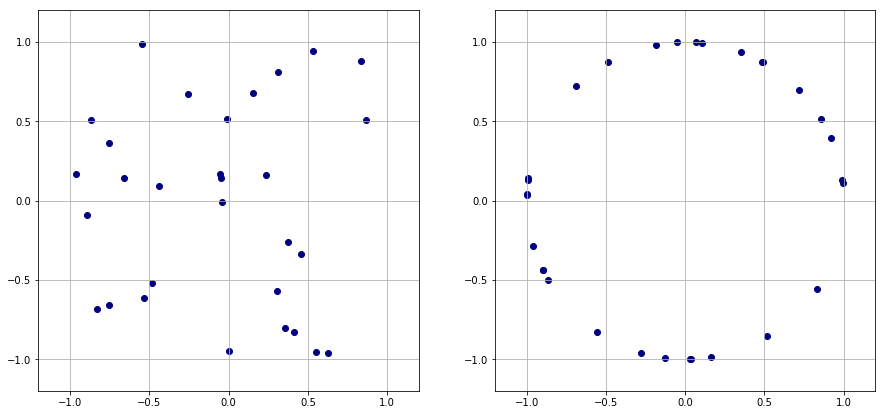

In [2]:
fig = plt.figure(figsize=(15,7))

fig = plt.subplot(1,2,1)
xs, ys = np.loadtxt("Data/square/city_conf.0", usecols=(0,1), unpack='true')
plt.scatter(xs,ys,color='navy')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.grid(True)
    
fig = plt.subplot(1,2,2)
xc, yc = np.loadtxt("Data/circle/city_conf.0", usecols=(0,1), unpack='true')
plt.scatter(xc,yc,color='navy')
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.grid(True)
    
plt.show()

Il percorso ottimale minimizza la funzione costo:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

(con $\vec{x}_{N+1}=\vec{x}_1$)

*Nota:* tutte le mutazioni vengono eseguite in *periodic boundary conditions*

Possiamo minimizzare la funzione costo simulando un sistema fisico in cui l'energia corrisponda a $L^{(2)}$ e abbassando progressivamente la temperatura del sistema fittizio.
Se questa diminuzione di temperatura avviene abbastanza lentamente, il sistema andrà a minimizzare la propria energia "naturalmente", fornendo così la soluzione al nostro problema.

Si suppone che l'energia del sistema segua la distribuzione di Boltzmann $p(x) = e^{-\beta E}/Z$ e $p(x)$ viene campionata attraverso l'algoritmo di Metropolis nel seguente modo:
- ad ogni step viene proposta una mutazione tra Swap, Local Shift e Permutation, ciascuna con una probabilità di $1/3$.
- se la mutazione dovesse risultare vantaggiosa, la mossa viene accettata. Altrimenti, essa viene accettata con una probabilità pari a: $min[1, e^{-\beta \Delta E}]$.

Per ogni T fissata vengono eseguiti $10^4$ step e la temperatura viene abbasata in 3 set:
- T diminuisce progressivamente di $0.05$ nel range $[10, 1]$
- T diminuisce progressivamente di $0.005$ nel range $[1, 0.005]$
- T diminuisce progressivamente di $0.0001$ nel range $[0.005, 0.0001]$

Ad alta temperatura l'accettazione del Metropolis si aggira attorno al 70/80% e il raffreddamento viene eseguito abbastanza velocemente.
A basse temperature invece, l'accettazione arriva allo 0% e il raffreddamento viene eseguito con più cautela, per evitare che il sistema finisca in un minimo locale.

Con questo schema di lavoro si riesce a bilanciare entrambe le richieste di ergodicità e di minimizzazione dell'energia.
Partendo da alte temperature e con una diminuzione molto lenta il sistema è infatti libero di "visitare" molte configurazioni senza incastrarsi in un minimo locale.

Di seguito viene rappresentato l'andamento del **miglior** percorso in funzione della temperatura e del numero di passi per entrambe le configurazioni di città e i risultati finali.

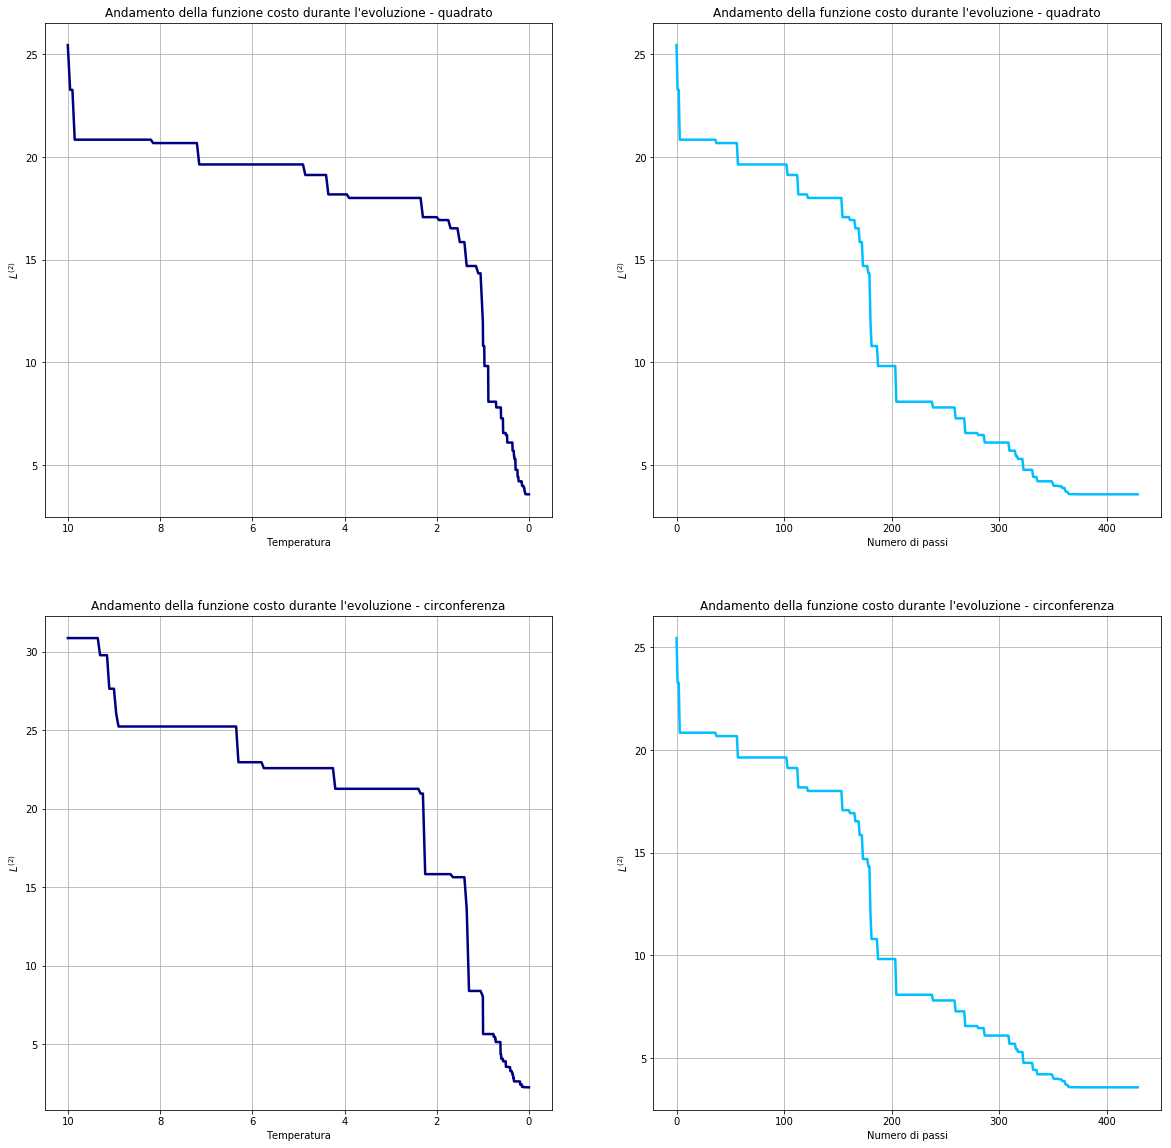

In [3]:
fig = plt.figure(figsize=(20,20))

fig = plt.subplot(2,2,1)
temp, bests = np.loadtxt("Data/square/path_length.dat", usecols=(0,1), unpack='true')
plt.plot(temp, bests, linewidth='2.5', color='navy')
plt.title('Andamento della funzione costo durante l\'evoluzione - quadrato')
plt.xlim(10.5,-0.5)
plt.xlabel('Temperatura')
plt.ylabel('$L^{(2)}$')
plt.grid(True)

end = len(bests)   #uguale anche per circ.
N=np.linspace(0,end,end)

fig = plt.subplot(2,2,2)
plt.plot(N,bests,linewidth='2.5', color='deepskyblue')
plt.title('Andamento della funzione costo durante l\'evoluzione - quadrato')
plt.xlabel('Numero di passi')
plt.ylabel('$L^{(2)}$')
plt.grid(True)

fig = plt.subplot(2,2,3)
temp, bestc = np.loadtxt("Data/circle/path_length.dat", usecols=(0,1), unpack='true')
plt.plot(temp, bestc, linewidth='2.5', color='navy')
plt.xlim(10.5,-0.5)
plt.title('Andamento della funzione costo durante l\'evoluzione - circonferenza')
plt.xlabel('Temperatura')
plt.ylabel('$L^{(2)}$')
plt.grid(True)

fig = plt.subplot(2,2,4)
plt.plot(N,bests, linewidth='2.5', color='deepskyblue')
plt.title('Andamento della funzione costo durante l\'evoluzione - circonferenza')
plt.xlabel('Numero di passi')
plt.ylabel('$L^{(2)}$')
plt.grid(True)

plt.show()

In [4]:
Ns = np.loadtxt("Data/square/best_path_conf.dat", unpack='true')
Ns = np.append(Ns, Ns[0])  #aggiungo punto iniziale alla fine
print('Miglior percorso (quadrato):')
print(Ns)
print('\n' + 'Costo (quadrato):')
print(bests[-1])

Nc = np.loadtxt("Data/circle/best_path_conf.dat", unpack='true')
Nc = np.append(Nc, Nc[0])  #aggiungo punto iniziale alla fine

print('\n' + 'Miglior percorso (circonferenza):')
print(Nc)
print('\n' + 'Costo (circonferenza):')
print(bestc[-1])

Miglior percorso (quadrato):
[10. 27.  5. 12. 24.  4. 26. 28. 18. 16. 15.  2. 13. 20.  1. 21.  3. 29.
  6. 22. 19. 14. 11.  0. 17. 25.  9.  7.  8. 23. 10.]

Costo (quadrato):
3.5776

Miglior percorso (circonferenza):
[ 6.  2. 21. 25. 12. 11.  9. 18. 13. 20.  7.  0. 14.  1. 23. 22. 29. 28.
 16.  3. 10.  4. 26. 24. 27. 17.  5. 15. 19.  8.  6.]

Costo (circonferenza):
2.24714


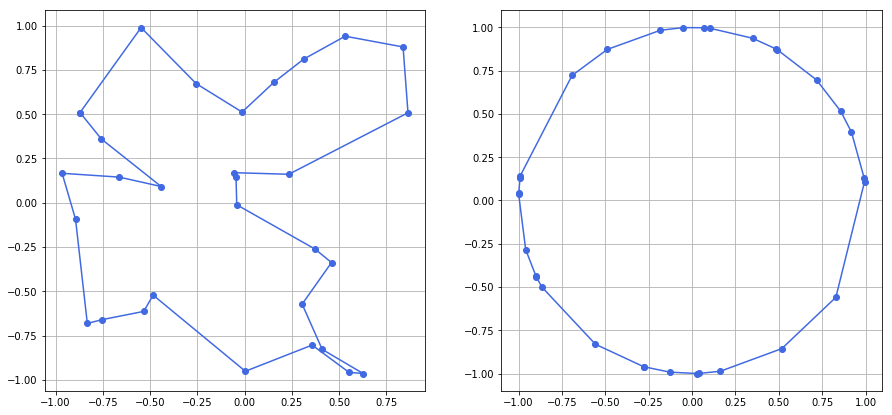

In [5]:
fig = plt.figure(figsize=(15,7))

fig = plt.subplot(1,2,1)
x=[]
y=[]
for i in range(0,31):
    x.append(xs[int(Ns[i])])
    y.append(ys[int(Ns[i])])
plt.plot(x,y,color='royalblue',marker='o')
plt.grid(True)

fig = plt.subplot(1,2,2)
x=[]
y=[]
for i in range(0,31):
    x.append(xc[int(Nc[i])])
    y.append(yc[int(Nc[i])])
plt.plot(x,y,color='royalblue', marker='o')
plt.grid(True)

plt.show()

Siccome la disposizione delle città è identica a quella utilizzata nel laboratorio 09 possiamo confrontare i risultati, che risultano perfettamente identici.

### Calcolo parallelo

Eseguiamo ora la stessa simulazione dell'esercizio 1 mediante il calcolo parallelo, diviso in 4 rank.
Siccome il generatore di numeri casuali è stato inizializzato diversamente per ciascun rank abbiamo a disposizione 4 simulazioni diverse, i risultati finali delle quali possono essere confrontati.

*Nota:* la configurazione delle città viene inizializzata nel costruttore della classe che esegue l'intero programma di Simulated Annealing, perciò con 4 generatori diversi si ottengono 4 configurazioni di città diverse e i risultati non possono essere confrontati in quanto incompatibili.
Per evitare che questo avvenga, e per non dover modificare la struttura del codice utilizzata per l'esercizio e il laboratorio precedente, è sufficiente che il nodo 0 trasmetta la configurazione delle città agli altri nodi subito dopo l'inizializzazione.

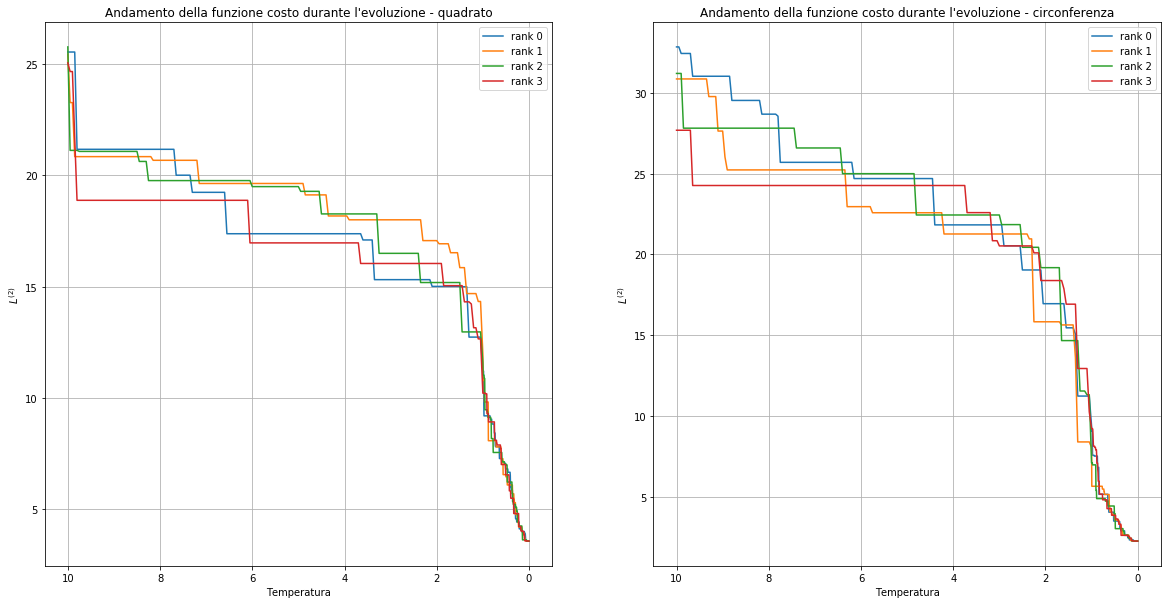

In [6]:
fig = plt.figure(figsize=(20,10))

bests_rank=[]
bestc_rank=[]

fig = plt.subplot(1,2,1)
for i in range(0,4):
    temp, bests = np.loadtxt("Data/square/path_length_" + str(i) + ".dat", usecols=(0,1), unpack='true')
    bests_rank.append(bests)  #vettore di vettori best
    plt.plot(temp, bests, label=('rank '+str(i)))
    plt.title('Andamento della funzione costo durante l\'evoluzione - quadrato')
    plt.xlim(10.5,-0.5)
    plt.xlabel('Temperatura')
    plt.ylabel('$L^{(2)}$')
    plt.legend()
    plt.grid(True)

fig = plt.subplot(1,2,2)
for i in range(0,4):
    temp, bestc = np.loadtxt("Data/circle/path_length_" + str(i) + ".dat", usecols=(0,1), unpack='true')
    bestc_rank.append(bestc)
    plt.plot(temp, bestc, label=('rank '+str(i)))
    plt.xlim(10.5,-0.5)
    plt.title('Andamento della funzione costo durante l\'evoluzione - circonferenza')
    plt.xlabel('Temperatura')
    plt.ylabel('$L^{(2)}$')
    plt.legend()
    plt.grid(True)

plt.show()

In [7]:
Ns_rank = []
Nc_rank = []

for i in range(0,4):

    Ns = np.loadtxt("Data/square/best_path_conf_" + str(i) + ".dat", unpack='true')
    Ns = np.append(Ns, Ns[0])  #aggiungo punto iniziale alla fine
    print('\n' + 'Miglior percorso (quadrato) - rank ' + str(i) + ':')
    print(Ns)
    print('\n' + 'Costo (quadrato):')
    print(bests_rank[i][-1])
    Ns_rank.append(Ns)

for i in range(0,4):
    Nc = np.loadtxt("Data/circle/best_path_conf_" + str(i) + ".dat", unpack='true')
    Nc = np.append(Nc, Nc[0])  #aggiungo punto iniziale alla fine

    print('\n' + 'Miglior percorso (circonferenza) - rank ' + str(i) + ':')
    print(Nc)
    print('\n' + 'Costo (circonferenza):')
    print(bestc_rank[i][-1])
    Nc_rank.append(Nc)


Miglior percorso (quadrato) - rank 0:
[24. 12.  5. 27. 10. 23.  8.  7.  9. 25. 17.  0. 11. 14. 19. 22.  6. 29.
  3. 21.  1. 20. 13.  2. 15. 16. 18. 28. 26.  4. 24.]

Costo (quadrato):
3.5776

Miglior percorso (quadrato) - rank 1:
[14. 11.  0. 17. 25.  9.  7.  8. 23. 10. 27.  5. 12. 24.  4. 26. 28. 18.
 16. 15.  2. 13. 20.  1. 21.  3. 29.  6. 22. 19. 14.]

Costo (quadrato):
3.5776

Miglior percorso (quadrato) - rank 2:
[28. 26.  4. 24. 12.  5. 27. 10. 23.  8.  7.  9. 25. 17.  0. 11. 14. 19.
 22.  6. 29.  3. 21.  1. 20. 13.  2. 15. 16. 18. 28.]

Costo (quadrato):
3.5776

Miglior percorso (quadrato) - rank 3:
[ 0. 17. 25.  9.  7.  8. 23. 10. 27.  5. 12. 24.  4. 26. 28. 18. 16. 15.
  2. 13. 20.  1. 21.  3. 29.  6. 22. 19. 14. 11.  0.]

Costo (quadrato):
3.5776

Miglior percorso (circonferenza) - rank 0:
[ 1. 23. 22. 29. 28. 16.  3. 10.  4. 26. 24. 27. 17.  5. 15. 19.  8.  6.
  2. 21. 25. 12. 11.  9. 18. 13. 20.  7.  0. 14.  1.]

Costo (circonferenza):
2.24714

Miglior percorso (circonfere

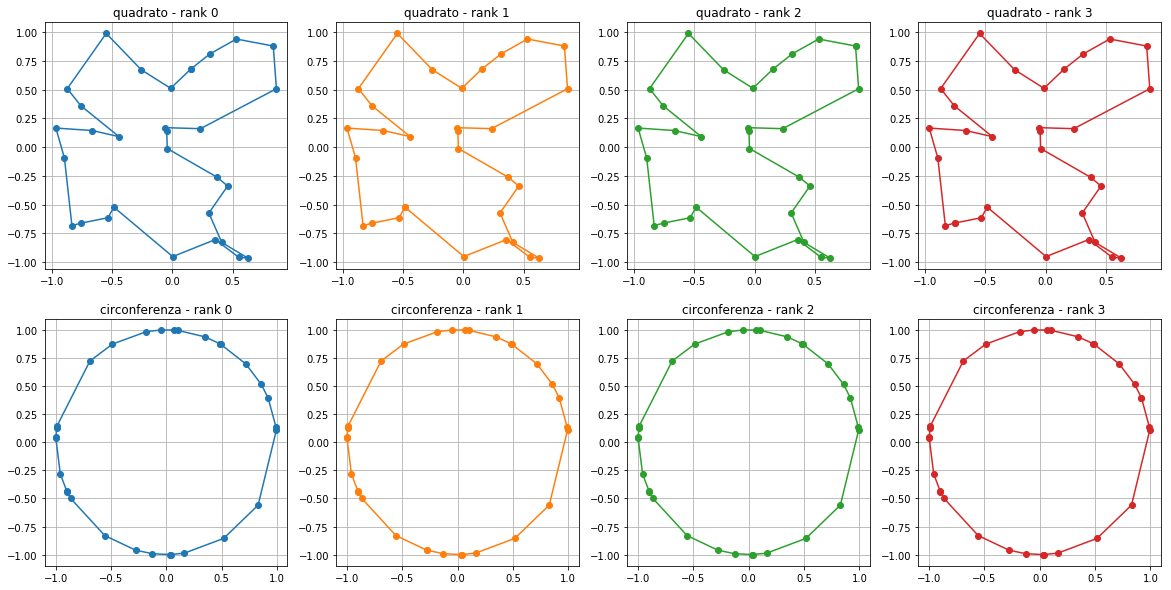

In [8]:
fig = plt.figure(figsize=(20,10))

c=['C0', 'C1', 'C2','C3']

for j in range(0,4): 
    fig = plt.subplot(2,4,j+1)
    x=[]
    y=[]
    for i in range(0,31):
        x.append(xs[int(Ns_rank[j][i])])
        y.append(ys[int(Ns_rank[j][i])])
    plt.plot(x,y,marker='o', color=c[j])
    plt.title("quadrato - rank " + str(j))
    plt.grid(True)

for j in range(0,4):
    fig = plt.subplot(2,4,j+5)
    x=[]
    y=[]
    for i in range(0,31):
        x.append(xc[int(Nc_rank[j][i])])
        y.append(yc[int(Nc_rank[j][i])])
    plt.plot(x,y, marker='o', color=c[j])
    plt.title("circonferenza - rank " + str(j))
    plt.grid(True)

plt.show()